<a href="https://colab.research.google.com/github/nikhilcoding0013/Harvard-AI-Summer-Program-2025/blob/main/Nikhil_Trivedi_D1H1VC_Hyperparameters_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hyperparameters

Harvard AI Bootcamp



Read: https://towardsdatascience.com/parameters-and-hyperparameters-aa609601a9ac


Hyperparameter tuning is a massively important area of ML research and engineering, and it comprises a lot of what ML engineers and researchers do daily.

In this homework, we'll introduce some of the most fundamental hyperparameters that are commonly used in ML and go over Grid Search and Random Search, two commonly used hyperparameter tuning algorithms.

## Make a copy of this notebook! Editing directly will not be saved.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, RandomSampler, Subset
import torch.nn as nn
import torch.optim as optim
import itertools
import random

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#HYPERPARAMETERS

#TRAINING HYPERPARAMETERS
BATCH_SIZE = 8 #choose between 1 and 10
NUM_EPOCHS = 4 #choose between 1 and 5
LR = 0.0001 #choose between 0.0001 to 0.1
OPTIM_ALG = "adam" #choose from ['sgd', 'adam']

#ARCHITECTURE HYPERPARAMETERS
NUM_NEURONS = 1000 #anything!
ACTIVATION_FN = "tanh" #choose from ['relu', 'sigmoid', 'gelu', 'tanh']

activation_fns = {'relu': nn.ReLU(), 'sigmoid': nn.Sigmoid(), 'gelu': nn.GELU(), 'tanh': nn.Tanh()}

In [ ]:
#Load the Fashion MNIST dataset, a dataset of grayscaled articles of clothing

#transform is applied to all the datapoints in our dataset and commonly used to normalize/preprocess data. here, all we do is convert to tensor
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)

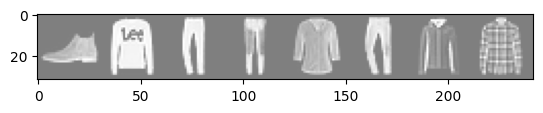

Ankle boot      	Pullover      	Trouser      	Trouser      	Shirt      	Trouser      	Coat      	Shirt


In [ ]:
images, labels = next(iter(testloader))

# Fashion MNIST labels
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print('      \t'.join(f'{classes[labels[j]]}' for j in range(BATCH_SIZE)))

In [ ]:
class Net(nn.Module):
  def __init__(self, num_inputs, num_hidden, num_outputs):
    super().__init__()
    self.linear1 = nn.Linear(num_inputs, num_hidden)
    self.tanh = nn.Tanh()
    self.linear2 = nn.Linear(num_hidden, num_outputs)

  def forward(self, x):
    x = x.view(x.size(0), -1)
    x = self.linear1(x)
    x = self.tanh(x)
    x = self.linear2(x)
    return x

In [ ]:
def create_net(num_neurons, activation_fn):
  #TODO: Implement a function that creates and returns a 1 layer neural network given the above hyperparameters
  #the dimension of the input of the network should be 28*28 and the dimension of the output should be 10

  return Net(28*28, num_neurons, 10)

net = create_net(NUM_NEURONS, activation_fns[ACTIVATION_FN])

In [ ]:
#Define a Loss function and optimizer
criterion = nn.CrossEntropyLoss()

if OPTIM_ALG == "sgd":
  optimizer = optim.SGD(net.parameters(), lr=LR)
elif OPTIM_ALG == "adam":
  optimizer = optim.Adam(net.parameters(), lr = LR)

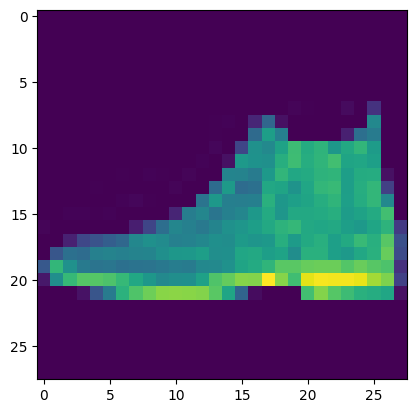

Prediction:  tensor([9]) Ankle boot
Correct:  tensor(9) Ankle boot


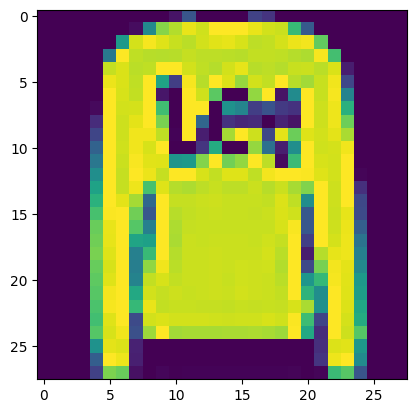

Prediction:  tensor([2]) Pullover
Correct:  tensor(2) Pullover


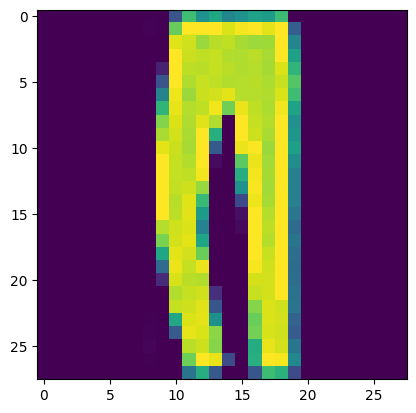

Prediction:  tensor([1]) Trouser
Correct:  tensor(1) Trouser


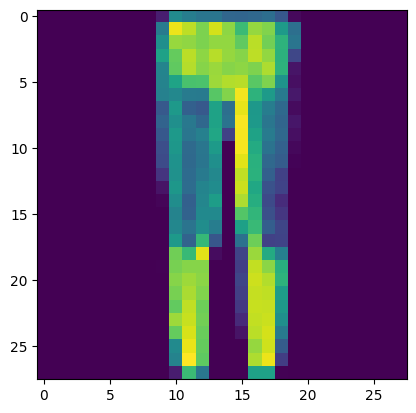

Prediction:  tensor([1]) Trouser
Correct:  tensor(1) Trouser


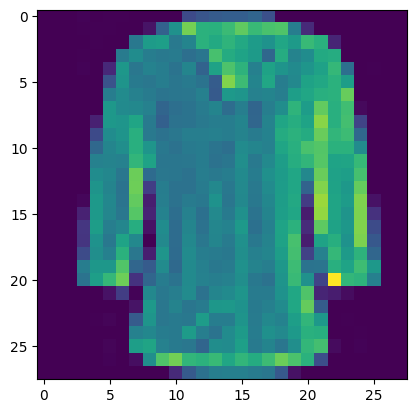

Prediction:  tensor([6]) Shirt
Correct:  tensor(6) Shirt


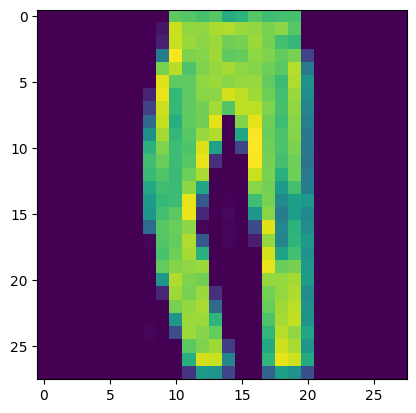

Prediction:  tensor([1]) Trouser
Correct:  tensor(1) Trouser


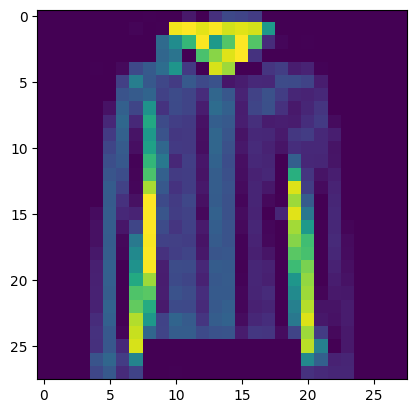

Prediction:  tensor([4]) Coat
Correct:  tensor(4) Coat


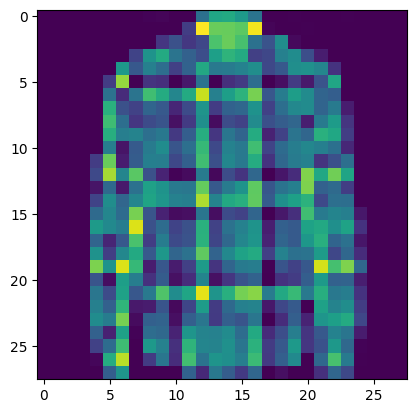

Prediction:  tensor([6]) Shirt
Correct:  tensor(6) Shirt


In [ ]:
def train_net(trainloader, criterion, optimizer, net, num_epochs):
  net.train()
  #TODO: implement a function that trains a neural network given the above inputs and returns the trained net
  for epoch in range(num_epochs):
    for inputs, labels in trainloader:
      optimizer.zero_grad()
      outputs = net(inputs)

      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

  return net

net = train_net(trainloader, criterion, optimizer, net, NUM_EPOCHS)

for i in range(BATCH_SIZE):
  imshow(images[i,:])
  pred = torch.max(net(images[i]).data, 1).indices
  print("Prediction: ", pred, classes[pred])
  print("Correct: ", labels[i], classes[labels[i]])

Accuracy of the network on the 10000 test images: 87.33999999999999%


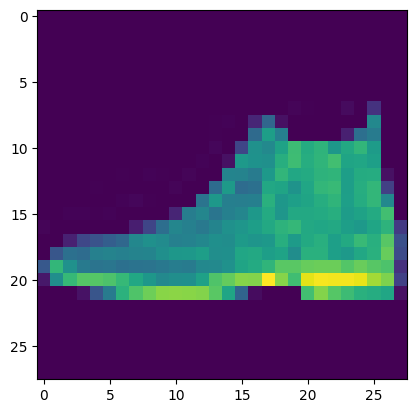

Prediction:  tensor([9]) Ankle boot
Correct:  tensor(9) Ankle boot


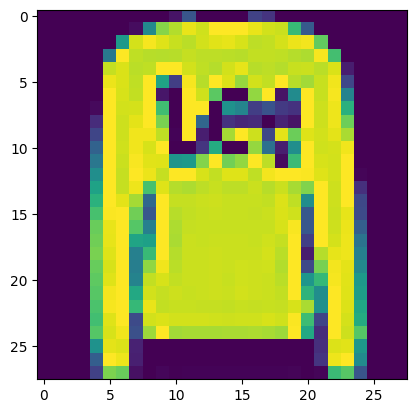

Prediction:  tensor([2]) Pullover
Correct:  tensor(2) Pullover


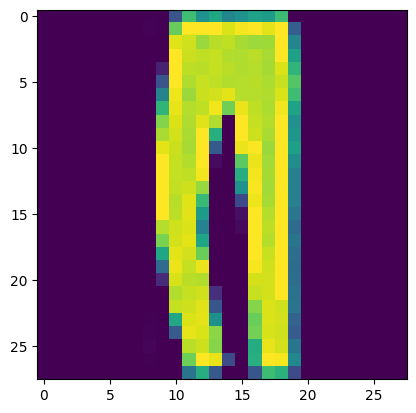

Prediction:  tensor([1]) Trouser
Correct:  tensor(1) Trouser


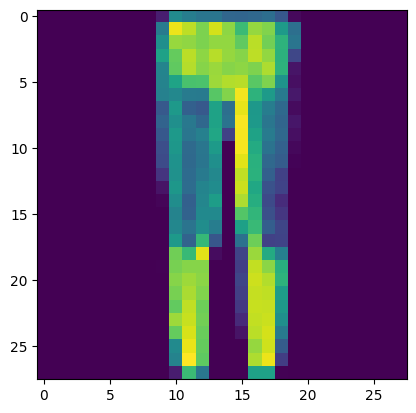

Prediction:  tensor([1]) Trouser
Correct:  tensor(1) Trouser


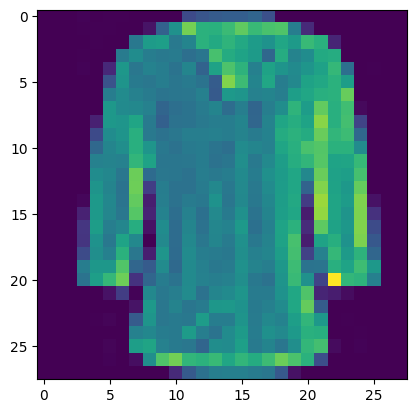

Prediction:  tensor([6]) Shirt
Correct:  tensor(6) Shirt


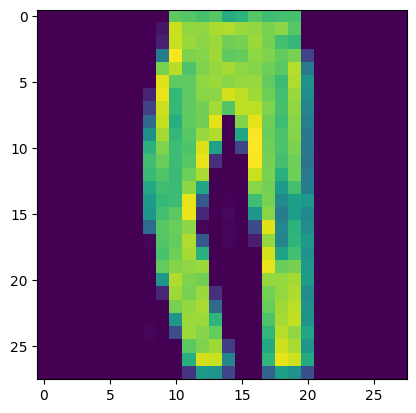

Prediction:  tensor([1]) Trouser
Correct:  tensor(1) Trouser


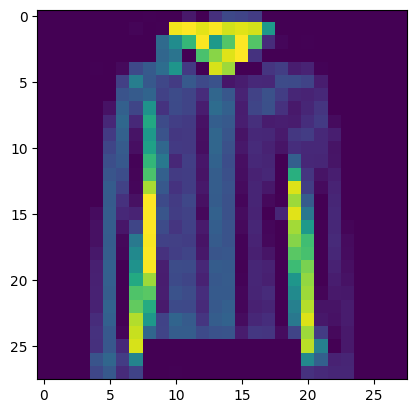

Prediction:  tensor([4]) Coat
Correct:  tensor(4) Coat


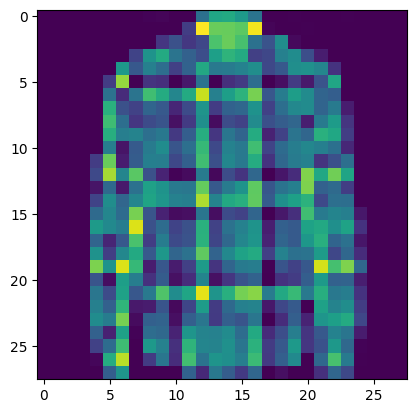

Prediction:  tensor([6]) Shirt
Correct:  tensor(6) Shirt


In [ ]:
# Test the network on the test data
def test_acc(net, testloader):
  #TODO: return the accuracy of the model on all the images in the testdataset
  net.eval() # Set model to eval mode
  true_outputs, num_outputs = 0., 0.
  with torch.no_grad():
    for inputs, labels in testloader:
      outputs = net(inputs)
      _, output_labels = outputs.max(dim=1)

      true_outputs += (output_labels == labels).sum().item()
      num_outputs += labels.size(0)
  acc = true_outputs/num_outputs
  return 100*acc
print(f'Accuracy of the network on the 10000 test images: {test_acc(net, testloader)}%')

for i in range(BATCH_SIZE):
  imshow(images[i,:])
  pred = torch.max(net(images[i]).data, 1).indices
  print("Prediction: ", pred, classes[pred])
  print("Correct: ", labels[i], classes[labels[i]])

## Grid Search

Read about grid search and random search here: https://neptune.ai/blog/hyperparameter-tuning-in-python-complete-guide

They're both pretty simple methods. For grid search, itertools.product will be helpful and for random search, random.choice will be helpful.

In [ ]:
from torch.utils.data import RandomSampler, DataLoader, Subset

#We'll use a subset of the training/testing data to make things run faster
search_trainset = Subset(trainset, np.arange(1000))
search_testset = Subset(testset, np.arange(1000))

# Define the hyperparameter space
batch_sizes = [1, 5]
num_epochs = [1, 5]
learning_rates = [0.001, 0.01]
nums_neurons = [100, 1000]
activation_fns = {'relu': nn.ReLU(), 'gelu': nn.GELU()}
optim_alg = "adam" #we'll just only use adam here because it will cut runtime in half and adam is just plainly superior than sgd

In [ ]:
#TODO Implement gridsearch
best_acc = 0.0
best_params = {}

batch_sizes    = list(range(1, 11))                 # 1 through 10
epoch_list     = list(range(1, 6))                  # 1 through 5
learning_rates = [0.0001, 0.001, 0.01, 0.1]         # from 1e-4 to 1e-1
nums_neurons   = [100, 1000]                        # as before
optim_algos    = ['sgd', 'adam']                    # your two optimizers
activation_fns = {                                  # activation classes
    'relu':    nn.ReLU,
    'sigmoid': nn.Sigmoid,
    'gelu':    nn.GELU,
    'tanh':    nn.Tanh
}

for bs in batch_sizes:
    trainloader = DataLoader(search_trainset, batch_size=bs, shuffle=True)
    testloader  = DataLoader(search_testset,  batch_size=bs, shuffle=False)

    for ne in epoch_list:
        for lr in learning_rates:
            for nh in nums_neurons:
                for act_name, act_cls in activation_fns.items():
                    for optim_name in optim_algos:
                        # build model
                        net       = create_net(nh, act_cls)
                        criterion = nn.CrossEntropyLoss()
                        # build optimizer
                        if optim_name == 'sgd':
                            optimizer = optim.SGD(net.parameters(), lr=lr)
                        else:
                            optimizer = optim.Adam(net.parameters(), lr=lr)

                        # train & eval
                        net = train_net(trainloader, criterion, optimizer, net, ne)
                        acc = test_acc(net, testloader)

                        # track best
                        if acc > best_acc:
                            best_acc    = acc
                            best_params = {
                                'batch_size':    bs,
                                'num_epochs':    ne,
                                'learning_rate': lr,
                                'num_hidden':    nh,
                                'activation':    act_name,
                                'optimizer':     optim_name
                            }

                        print(f"bs={bs:2d}  ep={ne:1d}  lr={lr:.4f}  nh={nh:4d}  act={act_name:<7}  opt={optim_name:<4} → acc={acc:5.2f}%")

print(f"\nBest accuracy: {best_acc:.2f}% with {best_params}")

bs= 1  ep=1  lr=0.0001  nh= 100  act=relu     opt=sgd  → acc=23.20%
bs= 1  ep=1  lr=0.0001  nh= 100  act=relu     opt=adam → acc=62.70%
bs= 1  ep=1  lr=0.0001  nh= 100  act=sigmoid  opt=sgd  → acc=18.90%
bs= 1  ep=1  lr=0.0001  nh= 100  act=sigmoid  opt=adam → acc=67.30%
bs= 1  ep=1  lr=0.0001  nh= 100  act=gelu     opt=sgd  → acc=16.30%
bs= 1  ep=1  lr=0.0001  nh= 100  act=gelu     opt=adam → acc=64.90%
bs= 1  ep=1  lr=0.0001  nh= 100  act=tanh     opt=sgd  → acc=30.80%
bs= 1  ep=1  lr=0.0001  nh= 100  act=tanh     opt=adam → acc=67.80%
bs= 1  ep=1  lr=0.0001  nh=1000  act=relu     opt=sgd  → acc=42.40%
bs= 1  ep=1  lr=0.0001  nh=1000  act=relu     opt=adam → acc=70.80%
bs= 1  ep=1  lr=0.0001  nh=1000  act=sigmoid  opt=sgd  → acc=47.60%
bs= 1  ep=1  lr=0.0001  nh=1000  act=sigmoid  opt=adam → acc=68.50%
bs= 1  ep=1  lr=0.0001  nh=1000  act=gelu     opt=sgd  → acc=35.40%
bs= 1  ep=1  lr=0.0001  nh=1000  act=gelu     opt=adam → acc=69.80%
bs= 1  ep=1  lr=0.0001  nh=1000  act=tanh     op

KeyboardInterrupt: 

In [ ]:
print(f"\nBest accuracy: {best_acc:.2f}% with {best_params}")


Best accuracy: 77.40% with {'batch_size': 8, 'num_epochs': 4, 'learning_rate': 0.0001, 'num_hidden': 1000, 'activation_fn': 'tanh', 'optimizer': 'adam'}


## Random Search



In [ ]:
#TODO implement random search
batch_sizes    = list(range(1, 11))            # 1–10
epoch_list     = list(range(1, 6))             # 1–5
learning_rates = [0.0001, 0.001, 0.01, 0.1]    # 1e-4 to 1e-1
nums_neurons   = [100, 1000]                   # hidden sizes
optim_algos    = ['sgd', 'adam']               # optimizers
activation_fns  = {
    'relu':    nn.ReLU(),
    'sigmoid': nn.Sigmoid(),
    'gelu':    nn.GELU(),
    'tanh':    nn.Tanh()
}

best_accuracy = 0.0
best_params   = {}
num_iterations = 16   # number of random trials

# 2) Random search
for i in range(num_iterations):
    bs        = random.choice(batch_sizes)
    ne        = random.choice(epoch_list)
    lr        = random.choice(learning_rates)
    nh        = random.choice(nums_neurons)
    act_name  = random.choice(list(activation_fns.keys()))
    act_fn    = activation_fns[act_name]
    optim_name= random.choice(optim_algos)

    # DataLoaders
    trainloader = DataLoader(search_trainset, batch_size=bs, shuffle=True)
    testloader  = DataLoader(search_testset,  batch_size=bs, shuffle=False)

    # Build model + training components
    net       = create_net(nh, act_fn)
    criterion = nn.CrossEntropyLoss()
    if optim_name == 'sgd':
        optimizer = optim.SGD(net.parameters(), lr=lr)
    else:
        optimizer = optim.Adam(net.parameters(), lr=lr)

    # Train & eval
    net = train_net(trainloader, criterion, optimizer, net, ne)
    acc = test_acc(net, testloader)

    # Track best
    if acc > best_accuracy:
        best_accuracy = acc
        best_params   = {
            'batch_size':     bs,
            'num_epochs':     ne,
            'learning_rate':  lr,
            'num_hidden':     nh,
            'activation_fn':  act_name,
            'optimizer':      optim_name
        }

    print(f"Iter {i+1}/{num_iterations}: bs={bs}, ep={ne}, lr={lr}, nh={nh}, act={act_name}, opt={optim_name} → acc={acc:.2f}%")

# 3) Report best found
print(f"\nBest accuracy: {best_accuracy:.2f}% with {best_params}")

Iter 1/16: bs=10, ep=4, lr=0.1, nh=1000, act=tanh, opt=adam → acc=30.10%
Iter 2/16: bs=7, ep=1, lr=0.01, nh=100, act=tanh, opt=adam → acc=55.80%
Iter 3/16: bs=8, ep=4, lr=0.0001, nh=1000, act=tanh, opt=adam → acc=73.40%
Iter 4/16: bs=4, ep=4, lr=0.1, nh=1000, act=sigmoid, opt=adam → acc=51.80%
Iter 5/16: bs=4, ep=5, lr=0.001, nh=100, act=gelu, opt=sgd → acc=58.70%
Iter 6/16: bs=4, ep=4, lr=0.0001, nh=100, act=tanh, opt=adam → acc=71.10%
Iter 7/16: bs=6, ep=3, lr=0.0001, nh=1000, act=gelu, opt=sgd → acc=23.20%
Iter 8/16: bs=5, ep=2, lr=0.001, nh=1000, act=sigmoid, opt=adam → acc=71.30%
Iter 9/16: bs=3, ep=3, lr=0.01, nh=100, act=tanh, opt=adam → acc=58.00%
Iter 10/16: bs=10, ep=3, lr=0.01, nh=100, act=gelu, opt=adam → acc=70.70%
Iter 11/16: bs=4, ep=4, lr=0.1, nh=100, act=gelu, opt=adam → acc=29.30%
Iter 12/16: bs=3, ep=1, lr=0.001, nh=1000, act=sigmoid, opt=adam → acc=68.80%
Iter 13/16: bs=7, ep=2, lr=0.01, nh=1000, act=relu, opt=sgd → acc=68.20%
Iter 14/16: bs=10, ep=1, lr=0.0001, nh=